### Notebook to compare progres scores of a query against all CPs of a target

In [103]:
qz = '/home/ubuntu/synCP/data/d1qzya1_synCPs/d1qzya1_permutation_14.pdb'
k8 = '/home/ubuntu/synCP/data/d2dk8a1_synCPs/d2dk8a1_permutation_0.pdb'

In [143]:
qz = '/home/ubuntu/scope40/pdbstyle-2.08/d2ff4a2.pdb'
k8 = '/home/ubuntu/scope40/pdbstyle-2.08/d1elwa_.pdb'

In [144]:
def tmscore(q,t, cp=False):
    ''' Run TM-align and get back TM-align score '''
    if cp:
        output = os.popen(f'/home/ubuntu/TM_tools/TMalign {q} {t} -cp')
    else:
        output = os.popen(f'/home/ubuntu/TM_tools/TMalign {q} {t}')
    tms = {"tms":[]}
    parse_float = lambda x: float(x.split("=")[1].split()[0])

    for line in output:
        line = line.rstrip()
        if line.startswith("TM-score"): 
            tms["tms"].append(parse_float(line))
    min_tms = min(tms['tms'])
    return min_tms

In [145]:
cp_score = tmscore(qz,k8,cp=True)
nocp_score = tmscore(qz,k8,cp=False)
print(cp_score,nocp_score)

0.57726 0.57726


In [135]:
output = os.popen(f'/home/ubuntu/TM_align/TMalign {k8} {qz}').read()

In [136]:
output

'\n *********************************************************************\n * TM-align (Version 20220412): protein structure alignment          *\n * References: Y Zhang, J Skolnick. Nucl Acids Res 33, 2302-9 (2005) *\n * Please email comments and suggestions to zhanglab@zhanggroup.org   *\n *********************************************************************\n\nName of Chain_1: /home/ubuntu/scope40/pdbstyle-2.08/d1yzfa1.pdb (to be superimposed onto Chain_2)\nName of Chain_2: /home/ubuntu/scope40/pdbstyle-2.08/d3bzwa1.pdb\nLength of Chain_1: 195 residues\nLength of Chain_2: 240 residues\n\nAligned length= 180, RMSD=   3.16, Seq_ID=n_identical/n_aligned= 0.211\nTM-score= 0.75340 (if normalized by length of Chain_1, i.e., LN=195, d0=5.20)\nTM-score= 0.62765 (if normalized by length of Chain_2, i.e., LN=240, d0=5.74)\n(You should use TM-score normalized by length of the reference structure)\n\n(":" denotes residue pairs of d <  5.0 Angstrom, "." denotes other aligned residues)\n-------MR

In [2]:
import os 
def set_trained_model_fp(model):
    '''Function to update progres model'''
    if model_name == 'CIRPIN':
        os.environ["TRAINED_MODEL_FP"] = "/home/ubuntu/progres-main/scripts/training/CIRPIN_model/model_5k_cp_epoch301.pt"
    if model_name == 'Progres':
        os.environ["TRAINED_MODEL_FP"] = "/home/ubuntu/miniforge3/envs/prog/lib/python3.9/site-packages/progres/trained_models/v_0_2_0/trained_model.pt"
    else:
        pass
    print(f"Updated trained_model_fp to: {os.environ['TRAINED_MODEL_FP']}")


## Define model to use:
model_name = 'Progres'
# Call set trained_model_fp
set_trained_model_fp(model_name)

Updated trained_model_fp to: /home/ubuntu/miniforge3/envs/prog/lib/python3.9/site-packages/progres/trained_models/v_0_2_0/trained_model.pt


In [3]:
import progres as pg
import torch

/home/ubuntu/miniforge3/envs/prog/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/ubuntu/miniforge3/envs/prog/lib/python3.9/site-packages/progres/trained_models/v_0_2_0/trained_model.pt


In [4]:
model = pg.load_trained_model()


Using model trained_model.pt


In [5]:
coords_exg = pg.read_coords('/home/ubuntu/pdbscratch/d1qzya1.pdb')
tul_emb = pg.embed_structure('/home/ubuntu/pdbscratch/d2dk8a1.pdb')


Using model trained_model.pt


In [ ]:
coords_exg = pg.read_coords('/home/ubuntu/pdbscratch/d3cnaa_.pdb')
tul_emb = pg.embed_structure('/home/ubuntu/pdbscratch/d2pela_.pdb')


In [ ]:
#coords_exg = pg.read_coords('/home/ubuntu/pdbscratch/1bcf.pdb')
#tul_emb = pg.embed_structure('/home/ubuntu/pdbscratch/1rhg.pdb')

In [ ]:

exg_emb = pg.embed_structure('/home/ubuntu/pdbscratch/d1qzya1.pdb')
tul_emb = pg.embed_structure('/home/ubuntu/pdbscratch/d1qzya1_reres_cp_1.pdb')
score = pg.embedding_similarity(exg_emb,tul_emb)

In [117]:

import os, time
start = time.time()

emb1 = pg.embed_structure('/home/ubuntu/pdbscratch/d3cnaa_.pdb')
emb2 = pg.embed_structure('/home/ubuntu/pdbscratch/d2pela_.pdb')


end = time.time()
time_took = end - start
print(f"Time taken: {time_took} second")

start = time.time()
score = pg.embedding_similarity(emb1,emb2)
end = time.time()
time_took = end - start
print(f"Time taken: {time_took} second")

num_queries = 15_000
((num_queries**2)*(time_took))/60/60

Using model trained_model.pt
Using model trained_model.pt
Time taken: 0.7250502109527588 second
Time taken: 9.989738464355469e-05 second


6.243586540222168

In [ ]:
## Time Progres

In [ ]:


emb1 = pg.embed_structure('/home/ubuntu/pdbscratch/d3cnaa_.pdb')
emb2 = pg.embed_structure('/home/ubuntu/pdbscratch/d2pela_.pdb')
score = pg.embedding_similarity(emb1,emb2)

In [ ]:
score

In [6]:
t = torch.arange(1, 74)
t_circular_permutation = torch.roll(t, 1, 0)
print(t, f'\n{t_circular_permutation}')

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73]) 
tensor([73,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72])


In [7]:
def permutate_coords(coords, i):
    coords = torch.tensor(coords)
    coords_cp = torch.roll(coords, i, 0)
    return coords_cp

In [8]:
scores = []

for i in range(0,len(coords_exg)):
    coords_cp = permutate_coords(coords_exg, i)
    graph = pg.coords_to_graph(coords_cp, '')
    emb= pg.embed_graph(graph)
    score = pg.embedding_similarity(emb,tul_emb)
    scores.append(score)
    
print(scores)

Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model trained_model.pt
Using model tr

In [9]:
import matplotlib.pyplot as plt


In [10]:
scores_float = [t.item() for t in scores]
#y_values = scores_float[::-1]
y_values = scores_float
## Reverse the x-values with [::-1] 
x_values = [i for i in range(0,len(coords_exg))][::-1]
print(scores_float)

[0.38885298371315, 0.3857549726963043, 0.3676966726779938, 0.39014506340026855, 0.41268086433410645, 0.3903502821922302, 0.3772772550582886, 0.3866252303123474, 0.37836819887161255, 0.3592080771923065, 0.35462597012519836, 0.34911951422691345, 0.33466577529907227, 0.3476031720638275, 0.37358129024505615, 0.3933371305465698, 0.41135483980178833, 0.4536057114601135, 0.5085275769233704, 0.5256974101066589, 0.5208698511123657, 0.5029799938201904, 0.47407713532447815, 0.44959551095962524, 0.44381293654441833, 0.4165985584259033, 0.39928707480430603, 0.4122144877910614, 0.4447784423828125, 0.4832721948623657, 0.5282566547393799, 0.5633407235145569, 0.5565933585166931, 0.49268296360969543, 0.5063355565071106, 0.5085771679878235, 0.5047953724861145, 0.5042986869812012, 0.4942801594734192, 0.4946839511394501, 0.4834776818752289, 0.47604385018348694, 0.4733966290950775, 0.5136750936508179, 0.5518131256103516, 0.6474747657775879, 0.7595059871673584, 0.8178519010543823, 0.8409070372581482, 0.83993

In [11]:
print(len(coords_exg))

74


In [12]:
max_cp_score = max(y_values)

In [13]:
max_cp_score

0.9370203018188477

In [14]:
import pickle

with open("qz_k8_cirpin_values.pkl", "rb") as f:
    cirpin_values = pickle.load(f)

In [93]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

k8 = '/home/ubuntu/synCP/data/d2dk8a1_synCPs/d2dk8a1_permutation_0.pdb'
qz_dir = '/home/ubuntu/synCP/data/d1qzya1_synCPs'

tm_align_scores = {}

# Iterate through PDB files in the directory
for filename in os.listdir(qz_dir):
    if filename.endswith('.pdb'):
        pdb_path = os.path.join(qz_dir, filename)
        
        # Run TM-align
        output = os.popen(f'/home/ubuntu/TM_align/TMalign {k8} {pdb_path}').read()
        
        # Parse TM-scores from output
        # TM-align outputs two TM-scores normalized by different lengths
        matches = re.findall(r'TM-score=\s*(\d+\.\d+)', output)
        if len(matches) >= 2:
            tm_score1 = float(matches[0])
            tm_score2 = float(matches[1])
            tm_score = min(tm_score1, tm_score2)  
            tm_align_scores[filename] = tm_score
            print(f"{filename}: Scores: {tm_score1:.4f}, {tm_score2:.4f} -> Min: {tm_score:.4f}")
        elif len(matches) == 1:
            tm_score = float(matches[0])
            tm_align_scores[filename] = tm_score
            print(f"{filename}: Score: {tm_score:.4f}")
        else:
            print(f"  Warning: Could not parse TM-score for {filename}")

# Print summary
print(f"\nProcessed {len(scores)} structures")
if scores:
    print(f"TM-score range: {min(scores.values()):.4f} - {max(scores.values()):.4f}")
    

d1qzya1_permutation_31.pdb: Scores: 0.5774, 0.5388 -> Min: 0.5388
d1qzya1_permutation_59.pdb: Scores: 0.4009, 0.3769 -> Min: 0.3769
d1qzya1_permutation_61.pdb: Scores: 0.4267, 0.4010 -> Min: 0.4010
d1qzya1_permutation_64.pdb: Scores: 0.4642, 0.4360 -> Min: 0.4360
d1qzya1_permutation_1.pdb: Scores: 0.5615, 0.5257 -> Min: 0.5257
d1qzya1_permutation_67.pdb: Scores: 0.4926, 0.4632 -> Min: 0.4632
d1qzya1_permutation_8.pdb: Scores: 0.5922, 0.5549 -> Min: 0.5549
d1qzya1_permutation_54.pdb: Scores: 0.3530, 0.3366 -> Min: 0.3366
d1qzya1_permutation_30.pdb: Scores: 0.5871, 0.5482 -> Min: 0.5482
d1qzya1_permutation_32.pdb: Scores: 0.5700, 0.5317 -> Min: 0.5317
d1qzya1_permutation_71.pdb: Scores: 0.5522, 0.5166 -> Min: 0.5166
d1qzya1_permutation_51.pdb: Scores: 0.3094, 0.2915 -> Min: 0.2915
d1qzya1_permutation_43.pdb: Scores: 0.4647, 0.4324 -> Min: 0.4324
d1qzya1_permutation_47.pdb: Scores: 0.4078, 0.3799 -> Min: 0.3799
d1qzya1_permutation_12.pdb: Scores: 0.6443, 0.6034 -> Min: 0.6034
d1qzya1_perm

AttributeError: 'list' object has no attribute 'values'

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

k8 = '/home/ubuntu/synCP/data/d2dk8a1_synCPs/d2dk8a1_permutation_0.pdb'
qz_dir = '/home/ubuntu/synCP/data/d1qzya1_synCPs'

tm_align_scores_CP = {}

# Iterate through PDB files in the directory
for filename in os.listdir(qz_dir):
    if filename.endswith('.pdb'):
        pdb_path = os.path.join(qz_dir, filename)
        
        # Run TM-align
        output = os.popen(f'/home/ubuntu/TM_align/TMalign {k8} {pdb_path} -cp').read()
        
        # Parse TM-scores from output
        # TM-align outputs two TM-scores normalized by different lengths
        matches = re.findall(r'TM-score=\s*(\d+\.\d+)', output)
        if len(matches) >= 2:
            tm_score1 = float(matches[0])
            tm_score2 = float(matches[1])
            tm_score = min(tm_score1, tm_score2)  
            tm_align_scores_CP[filename] = tm_score
            print(f"{filename}: Scores: {tm_score1:.4f}, {tm_score2:.4f} -> Min: {tm_score:.4f}")
        elif len(matches) == 1:
            tm_score = float(matches[0])
            tm_align_scores_CP[filename] = tm_score
            print(f"{filename}: Score: {tm_score:.4f}")
        else:
            print(f"  Warning: Could not parse TM-score for {filename}")

# Print summary
print(f"\nProcessed {len(scores)} structures")
if scores:
    print(f"TM-score range: {min(scores.values()):.4f} - {max(scores.values()):.4f}")
    

d1qzya1_permutation_31.pdb: Scores: 0.6493, 0.6081 -> Min: 0.6081
d1qzya1_permutation_59.pdb: Scores: 0.6516, 0.6099 -> Min: 0.6099
d1qzya1_permutation_61.pdb: Scores: 0.6516, 0.6099 -> Min: 0.6099
d1qzya1_permutation_64.pdb: Scores: 0.6516, 0.6099 -> Min: 0.6099
d1qzya1_permutation_1.pdb: Scores: 0.6361, 0.5956 -> Min: 0.5956
d1qzya1_permutation_67.pdb: Scores: 0.6518, 0.6102 -> Min: 0.6102
d1qzya1_permutation_8.pdb: Scores: 0.6493, 0.6083 -> Min: 0.6083
d1qzya1_permutation_54.pdb: Scores: 0.6516, 0.6099 -> Min: 0.6099
d1qzya1_permutation_30.pdb: Scores: 0.6366, 0.5951 -> Min: 0.5951
d1qzya1_permutation_32.pdb: Scores: 0.6441, 0.6027 -> Min: 0.6027
d1qzya1_permutation_71.pdb: Scores: 0.6417, 0.6009 -> Min: 0.6009
d1qzya1_permutation_51.pdb: Scores: 0.6466, 0.6051 -> Min: 0.6051
d1qzya1_permutation_43.pdb: Scores: 0.6518, 0.6102 -> Min: 0.6102
d1qzya1_permutation_47.pdb: Scores: 0.6492, 0.6082 -> Min: 0.6082
d1qzya1_permutation_12.pdb: Scores: 0.6443, 0.6034 -> Min: 0.6034
d1qzya1_perm

AttributeError: 'list' object has no attribute 'values'

In [122]:
tm_align_sorted = dict(sorted(tm_align_scores.items(), key=lambda x: int(re.search(r'_(\d+)\.pdb', x[0]).group(1))))
tm_align_scores_CP_sorted = dict(sorted(tm_align_scores_CP.items(), key=lambda x: int(re.search(r'_(\d+)\.pdb', x[0]).group(1))))

In [123]:
tm_align_sorted

{'d1qzya1_permutation_0.pdb': 0.52574,
 'd1qzya1_permutation_1.pdb': 0.52574,
 'd1qzya1_permutation_2.pdb': 0.52574,
 'd1qzya1_permutation_3.pdb': 0.52574,
 'd1qzya1_permutation_4.pdb': 0.52574,
 'd1qzya1_permutation_5.pdb': 0.53084,
 'd1qzya1_permutation_6.pdb': 0.54007,
 'd1qzya1_permutation_7.pdb': 0.54535,
 'd1qzya1_permutation_8.pdb': 0.55489,
 'd1qzya1_permutation_9.pdb': 0.56817,
 'd1qzya1_permutation_10.pdb': 0.58128,
 'd1qzya1_permutation_11.pdb': 0.59231,
 'd1qzya1_permutation_12.pdb': 0.60337,
 'd1qzya1_permutation_13.pdb': 0.61022,
 'd1qzya1_permutation_14.pdb': 0.61022,
 'd1qzya1_permutation_15.pdb': 0.61022,
 'd1qzya1_permutation_16.pdb': 0.61022,
 'd1qzya1_permutation_17.pdb': 0.60818,
 'd1qzya1_permutation_18.pdb': 0.61022,
 'd1qzya1_permutation_19.pdb': 0.61022,
 'd1qzya1_permutation_20.pdb': 0.61022,
 'd1qzya1_permutation_21.pdb': 0.61022,
 'd1qzya1_permutation_22.pdb': 0.61022,
 'd1qzya1_permutation_23.pdb': 0.60343,
 'd1qzya1_permutation_24.pdb': 0.59772,
 'd1qzya1_

In [119]:
x_values

[73,
 72,
 71,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

In [131]:
with open('/home/ubuntu/TM_vec/k8_qz_tmvec.pkl', 'rb') as f:
    all_v_one_scores = pickle.load(f)

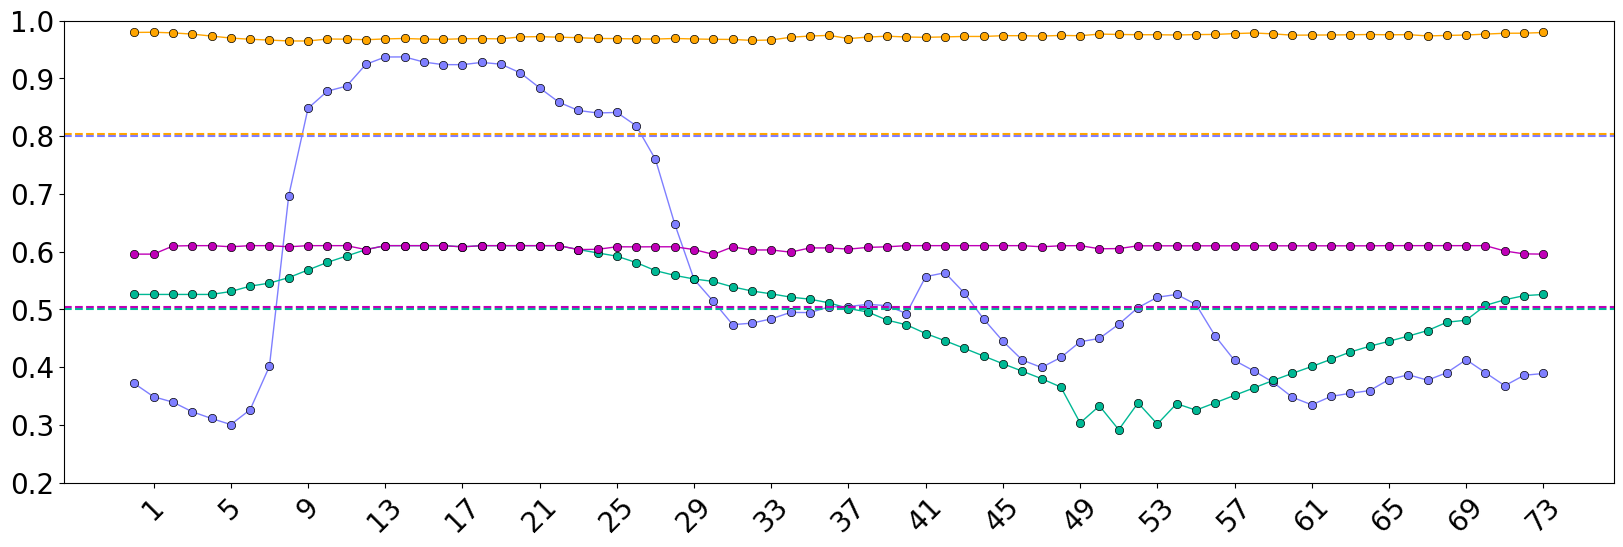

In [146]:
plt.figure(figsize=(20, 6))  # Optional: Set figure size

# Changed scatter to plot to connect the points
plt.plot(x_values, y_values, marker='o', color='#7f7fffff', linewidth=1, markeredgecolor='k', markeredgewidth=0.5)  # Line plot with markers
#plt.plot(x_values, all_v_one_scores[::-1], marker='o', color='red', linewidth=1, markeredgecolor='k', markeredgewidth=0.5)  # Line plot with markers

plt.plot(x_values, cirpin_values, marker='o', color='orange', linewidth=1, markeredgecolor='k', markeredgewidth=0.5)
plt.plot(range(0,74), tm_align_sorted.values(), marker='o', color='#00b894', linewidth=1, markeredgecolor='k', markeredgewidth=0.5)  # Line plot with markers
plt.plot(range(0,74), tm_align_scores_CP_sorted.values(), marker='o', color='#bf00b7', linewidth=1, markeredgecolor='k', markeredgewidth=0.5)
plt.xticks(x_values[:74:4], rotation=45)
plt.axhline(y=0.5, color='#00b894', linestyle='--', linewidth=1.5)
plt.axhline(y=0.504, color='#bf00b7', linestyle='--', linewidth=1.5)
plt.axhline(y=0.804, color='orange', linestyle='--', linewidth=1.5)
plt.axhline(y=0.8, color='#7f7fffff', linestyle='--', linewidth=1.5)

plt.ylim(0.2, 1)  # Set y-axis limits
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(False)  # Optional: Add grid lines for better readability
plt.savefig('CP_QZ_K8_Progres_CIRPIN.png')
plt.show()  # Display the plot

Generate a heatmap that compares all CPs of 1exg to all CPs of 1tul

In [ ]:
#coords_exg = pg.read_coords('/home/ubuntu/pdbscratch/2i24.pdb')
#coords_tul = pg.read_coords('/home/ubuntu/pdbscratch/3ess.pdb')

coords_exg = pg.read_coords('/home/ubuntu/pdbscratch/d1qzya1.pdb')
coords_tul = pg.read_coords('/home/ubuntu/pdbscratch/d2dk8a1.pdb')

In [ ]:
exg_emb = []
for i in range(0,len(coords_exg)):
    coords_cp = permutate_coords(coords_exg, i)
    graph = pg.coords_to_graph(coords_cp, '')
    emb= pg.embed_graph(graph)
    exg_emb.append(emb)


In [ ]:
tul_emb = []
for i in range(0,len(coords_tul)):
    coords_cp = permutate_coords(coords_tul, i)
    graph = pg.coords_to_graph(coords_cp, '')
    emb= pg.embed_graph(graph)
    tul_emb.append(emb)

In [ ]:
# exg and tul index to find the CP number of each that gave the highest score of 0.9696
all_v_all_scores = []
exg = 0
for exg_cp in exg_emb:
    exg +=1
    tul = 0
    for tul_cp in tul_emb:
        tul += 1
        if pg.embedding_similarity(exg_cp,tul_cp) > 0.95:
            print(exg,tul, pg.embedding_similarity(exg_cp,tul_cp))
        all_v_all_scores.append(pg.embedding_similarity(exg_cp,tul_cp))

print(len(all_v_all_scores))
all_v_all_scores

float_scores = [t.item() for t in all_v_all_scores]
float_scores

# Create histogram
plt.hist(float_scores, bins=200, range=(0, 1), color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of all vs all CP scores using Progres model: QK vs K8')

# Show the plot
plt.show()

In [ ]:
exg_embed_no_cp = pg.embed_structure('/home/ubuntu/pdbscratch/d1qzya1.pdb')
tul_embed_no_cp = pg.embed_structure('/home/ubuntu/pdbscratch/d2dk8a1.pdb')

exg_cp_scores = []
tul_cp_scores = []

for tul_cp in tul_emb:
    tul_cp_scores.append(pg.embedding_similarity(tul_cp, exg_embed_no_cp))

for exg_cp in exg_emb:
    exg_cp_scores.append(pg.embedding_similarity(exg_cp, tul_embed_no_cp))

In [ ]:
print('Max exg cp score:', max(exg_cp_scores))
print('Max tul cp score:',max(tul_cp_scores))
print('Max all v all cp score:',max(all_v_all_scores))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
c = torch.load('/home/ubuntu/domain_swap_pdbs/domain_swap_embed_CIRPIN_model_v2.pt')['embeddings']

#c = torch.load("progres_db_zero_pos_emb.pt")['embeddings']
c0 = c.unsqueeze(0)
c1 = c.unsqueeze(1)
score = pg.embedding_similarity(c0,c1)

labels = torch.load('/home/ubuntu/domain_swap_pdbs/domain_swap_embed_CIRPIN_model_v2.pt')['ids']
#labels = torch.load("progres_db_zero_pos_emb.pt")['ids']

labels_first = [label.split('_')[0] for label in labels]
#print(labels_first)
#domain = [label.split('_')[3] for label in labels]
#labels_first_domain = [f"{first}_{dom}" for first, dom in zip(labels_first, domain)]
labels_first_domain = labels_first
labels_first_domain = labels
vmin = 0.5  # Minimum value for the color scale
vmax = 1  # Maximum value for the color scale

plt.imshow(score, cmap='hot', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.xticks(ticks=np.arange(0,len(labels_first_domain),1), labels=labels_first_domain, rotation=90)
plt.yticks(ticks=np.arange(0,len(labels_first_domain),1), labels=labels_first_domain, rotation=0)
plt.title("CIRPIN domain swap")
plt.show()